### Mark Hoogendoorn and Burkhardt Funk (2017)              
Machine Learning for the Quantified Self               
Springer,
Chapter 7    

In [2]:
from util.VisualizeDataset import VisualizeDataset
from Chapter7.PrepareDatasetForLearning import PrepareDatasetForLearning
from Chapter7.LearningAlgorithms import ClassificationAlgorithms
from Chapter7.LearningAlgorithms import RegressionAlgorithms
from Chapter7.Evaluation import ClassificationEvaluation
from Chapter7.Evaluation import RegressionEvaluation
from Chapter7.FeatureSelection import FeatureSelectionClassification
from Chapter7.FeatureSelection import FeatureSelectionRegression
import copy
import pandas as pd
from util import util
import matplotlib.pyplot as plot
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from util import ClassificationReport
import os

In [3]:
DataViz = VisualizeDataset()

# Read the result from the previous chapter, and make sure the index is of the type datetime.
dataset_path = 'intermediate_datafiles/'

export_tree_path = 'Example_graphs/Chapter7/'

try:
    dataset = pd.read_csv(dataset_path + 'chapter5_result.csv', index_col=0)
except IOError as e:
    print('File not found, try to run previous crowdsignals scripts first!')
    raise e

if not os.path.exists(export_tree_path):
    os.makedirs(export_tree_path)

dataset.index = pd.to_datetime(dataset.index, format='%Y-%m-%d %H:%M:%S.%f'[:-3])

In [4]:
# Remove unnecessary columns
del dataset['participant']
del dataset['category']
del dataset['set']

In [5]:
# We create a single column with the categorical attribute representing our class. Furthermore, we use 70% of our data
# for training and the remaining 30% as an independent test set. We select the sets based on stratified sampling. We remove
# cases where we do not know the label.

prepare = PrepareDatasetForLearning()

train_X, test_X, train_y, test_y = prepare.split_single_dataset_classification(dataset, ['label'], 'like', 0.7, filter=True, temporal=False)

print 'Training set length is: ', len(train_X.index)
print 'Test set length is: ', len(test_X.index)

Training set length is:  4236
Test set length is:  1816


In [6]:
# Load algorithms
learner = ClassificationAlgorithms()
eval = ClassificationEvaluation()

In [7]:
selected_features = ['gyr_r_freq_0.0_Hz_ws_50',
                     'acc_y_temp_mean_ws_5',
                     'acc_x_temp_mean_ws_5',
                     'acc_y_temp_std_ws_5',
                     'acc_x_temp_std_ws_5',
                     'acc_z_temp_std_ws_5',
                     'gyr_z',
                     'gyr_r_freq_0.4_Hz_ws_50',
                     'gyr_y_temp_mean_ws_5',
                     'acc_r_freq_1.0_Hz_ws_50']

In [12]:
# Train a random forest predict class labels
class_train_y, class_test_y, class_train_prob_y, class_test_prob_y, model = learner.random_forest(train_X[selected_features], train_y, test_X[selected_features],
                                                                                           gridsearch=True, print_model_details=True)

{'n_estimators': 100, 'criterion': 'gini', 'min_samples_leaf': 2}
Feature importance random forest:
cluster  &  0.0896847465558
gyr_r_freq_0.0_Hz_ws_50  &  0.0860266904225
pca_1  &  0.0594748720767
acc_z  &  0.0573885963175
acc_z_temp_mean_ws_5  &  0.0555952331359
acc_y_temp_mean_ws_5  &  0.0546573397655
pca_2  &  0.0541319600428
acc_x_temp_mean_ws_5  &  0.0536787417472
acc_y  &  0.0528341411602
gyr_z_temp_std_ws_5  &  0.0477666319583
acc_x  &  0.0386314674436
gyr_r_temp_mean_ws_5  &  0.0323327201725
acc_r_pse  &  0.0321239912937
acc_x_temp_std_ws_5  &  0.0268430118706
pca_3  &  0.026459417872
acc_r_freq_0.0_Hz_ws_50  &  0.0259643420088
acc_r_temp_std_ws_5  &  0.0214452570018
acc_y_temp_std_ws_5  &  0.0210957500319
gyr_r_temp_std_ws_5  &  0.0188512735314
gyr_x_temp_std_ws_5  &  0.0138514141144
acc_z_temp_std_ws_5  &  0.00996299698884
gyr_y_temp_std_ws_5  &  0.00958096256858
gyr_r_pse  &  0.00865264492078
gyr_r  &  0.00703282364262
gyr_z_temp_mean_ws_5  &  0.00607873659966
gyr_z  &  0.0

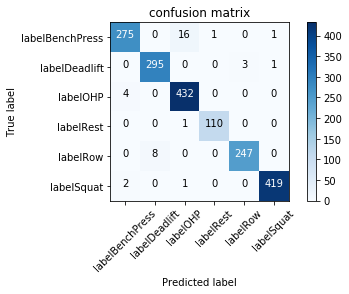

In [9]:
# Performance on the test set
test_cm = eval.confusion_matrix(test_y, class_test_y, class_train_prob_y.columns)
DataViz.plot_confusion_matrix(test_cm, class_train_prob_y.columns, normalize=False)

In [10]:
cm = confusion_matrix(test_y, class_test_y, class_train_prob_y.columns)
cr = classification_report(test_y, class_test_y, class_train_prob_y.columns)
accuracy = accuracy_score(test_y, class_test_y)

In [11]:
accuracy

0.97907488986784141